<a href="https://colab.research.google.com/github/ras1364/Run10BERT/blob/CommentWithBreak/BertWithBreak2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** BERT encoder + Comment With Break + NLP + MaxPooling and AveragePooling + NLP**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving X_test2.csv to X_test2.csv
Saving X_train2.csv to X_train2.csv
Saving y_test2.csv to y_test2.csv
Saving y_train2.csv to y_train2.csv


In [3]:
num = "2"
X_test = pd.read_csv("/content/X_test"+num+".csv")
X_train = pd.read_csv("/content/X_train"+num+".csv")
y_test = pd.read_csv("/content/y_test"+num+".csv")
y_train = pd.read_csv("/content/y_train"+num+".csv")

In [4]:
max_length = 100
# for x in range(0,len(X_train)):
#   line = X_train.loc[x].at["text"]
#   if max_length < len(line.split()) :
#     max_length = len(line.split())

print(max_length)


100


In [5]:
from gensim.parsing.preprocessing import remove_stopwords

def preprocess(text):
  return remove_stopwords(text)

X_train["stemmed_text_data"] = X_train["text"].map(preprocess)
X_test["stemmed_text_data"] = X_test["text"].map(preprocess)

In [6]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 133.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 103.0 MB/s eta 0:00:00


In [7]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [8]:
# For Test
# encoded = tokenizer.encode_plus("Hello beautifull human, i'm Reza", return_tensors="tf")
# embedding = bert_model(encoded['input_ids'],encoded['attention_mask'])

In [9]:
def percent_complete(step, total_steps, bar_width=60, title="", print_perc=True):
    import sys

    # UTF-8 left blocks: 1, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8
    utf_8s = ["█", "▏", "▎", "▍", "▌", "▋", "▊", "█"]
    perc = 100 * float(step) / float(total_steps)
    max_ticks = bar_width * 8
    num_ticks = int(round(perc / 100 * max_ticks))
    full_ticks = num_ticks / 8      # Number of full blocks
    part_ticks = num_ticks % 8      # Size of partial block (array index)

    disp = bar = ""                 # Blank out variables
    bar += utf_8s[0] * int(full_ticks)  # Add full blocks into Progress Bar

    # If part_ticks is zero, then no partial block, else append part char
    if part_ticks > 0:
        bar += utf_8s[part_ticks]

    # Pad Progress Bar with fill character
    bar += "▒" * int((max_ticks/8 - float(num_ticks)/8.0))

    if len(title) > 0:
        disp = title + ": "         # Optional title to progress display

    # Print progress bar in green: https://stackoverflow.com/a/21786287/6929343
    disp += "\x1b[0;32m"            # Color Green
    disp += bar                     # Progress bar to progress display
    disp += "\x1b[0m"               # Color Reset
    if print_perc:
        # If requested, append percentage complete to progress display
        if perc > 100.0:
            perc = 100.0            # Fix "100.04 %" rounding error
        disp += " {:6.2f}".format(perc) + " %"

    # Output to terminal repetitively over the same line using '\r'.
    sys.stdout.write("\r" + disp)
    sys.stdout.flush()

In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import tensorflow as tf

def encode(text, maxlen,maxSentences,mtitle):
  embeddings=[]
  counter = 1
  for row in text:
    embedding =[]
    counter+=1
    percent_complete(counter, len(text), title=mtitle)
    sentenceCounter = 0
    for sent in sent_tokenize(row):
      sentenceCounter +=1
      if(sentenceCounter<maxSentences):
        encoded = tokenizer.encode_plus(
          sent,
          add_special_tokens=True,
          max_length=maxlen,
          pad_to_max_length=True,
          return_attention_mask=True,
          return_tensors="tf"
          )
        embedding.append(bert_model(encoded['input_ids'],encoded['attention_mask'])[1])
    loop = maxSentences - len(embedding)
    for x in range(loop):
      embedding.append(tf.zeros([1,768],tf.int32))
    embeddings.append(embedding)

  return embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
# for test
#my_test= {"I love my little son. He is very qiute.","He is hamed and he was sick. he is best football player.","I love my little son. He is very qiute.","He is hamed and he was sick. he is best football player."}
#my_test_encoded = encode(my_test,5)

In [12]:
import time

In [13]:
max_sentences = 50
startedTime = time.time()
X_train_embedding = encode(X_train.stemmed_text_data,max_length,max_sentences,"X_train_embedding")
endTime= time.time()
print("\nTrain Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")
startedTime = time.time()
X_test_embedding  = encode(X_test.stemmed_text_data,max_length,max_sentences,"X_test_embedding")
endTime= time.time()
print("\nTest Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

X_train_embedding: ▏▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒   0.16 %

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


X_train_embedding: ████████████████████████████████████████████████████████████ 100.00 %
Train Elapsed Time :  5552.019092559814 sec or  92.53365154266358 min
X_test_embedding: ████████████████████████████████████████████████████████████▎ 100.00 %
Test Elapsed Time :  1387.7946238517761 sec or  23.129910397529603 min


In [14]:
np.shape(X_train_embedding)

(1280, 50, 1, 768)

In [15]:
X_train_embedding_squeezed = np.squeeze(X_train_embedding)
X_test_embedding_squeezed = np.squeeze(X_test_embedding)
print(np.shape(X_train_embedding_squeezed))
print(np.shape(X_test_embedding_squeezed))

(1280, 50, 768)
(320, 50, 768)


In [16]:
from tempfile import TemporaryFile
X_train_embedded_file = TemporaryFile()
X_test_embedded_file = TemporaryFile()
np.save(X_train_embedded_file,X_train_embedding_squeezed)
np.save(X_test_embedded_file,X_test_embedding_squeezed)


In [17]:
np.save("X_train_embedded_file.npy",X_train_embedding_squeezed)
np.save("X_test_embedded_file.npy",X_test_embedding_squeezed)


In [18]:
X_train_embedding_squeezed = np.load("X_train_embedded_file.npy")
X_test_embedding_squeezed = np.load("X_test_embedded_file.npy")

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
import keras

# define and fit the final model
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
   ]
model = Sequential()
model.add(keras.Input(shape=(50,768,)))
model.add(MaxPooling1D(pool_size=(50)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling1d (MaxPooling1D  (None, 1, 768)           0         
 )                                                               
                                                                 
 dense (Dense)               (None, 1, 64)             49216     
                                                                 
 dense_1 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 51,329
Trainable params: 51,329
Non-trainable params: 0
_________________________________________________________________


In [21]:
startedTime = time.time()
model.fit(X_train_embedding_squeezed,y_train.deceptive, epochs=50, batch_size=64, verbose=1)
endTime= time.time()
print("\nTrain Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

Epoch 1/50
20/20 [==============================] - 2s 22ms/step - loss: 0.6970 - accuracy: 0.5289 - precision: 0.5282 - recall: 0.5406
Epoch 2/50
20/20 [==============================] - 0s 12ms/step - loss: 0.6789 - accuracy: 0.6008 - precision: 0.6052 - recall: 0.5797
Epoch 3/50
20/20 [==============================] - 0s 18ms/step - loss: 0.6717 - accuracy: 0.5797 - precision: 0.6024 - recall: 0.4688
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6628 - accuracy: 0.5898 - precision: 0.5756 - recall: 0.6844
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6492 - accuracy: 0.6258 - precision: 0.6348 - recall: 0.5922
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6443 - accuracy: 0.6375 - precision: 0.6366 - recall: 0.6406
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.6414 - precision: 0.6434 - recall: 0.6344
Epoch 8/50
20/20 [==============================] - 

In [22]:
model.evaluate(X_test_embedding_squeezed, y_test.deceptive)

10/10 [==============================] - 0s 5ms/step - loss: 0.6075 - accuracy: 0.7000 - precision: 0.7759 - recall: 0.5625


[0.6075296401977539, 0.699999988079071, 0.7758620977401733, 0.5625]

In [23]:
y_predicted = model.predict(X_test_embedding_squeezed)
y_predicted = y_predicted.flatten()

10/10 [==============================] - 0s 4ms/step


In [24]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test.deceptive, y_predicted)
cm

array([[134,  26],
       [ 70,  90]])

Text(50.722222222222214, 0.5, 'Truth')

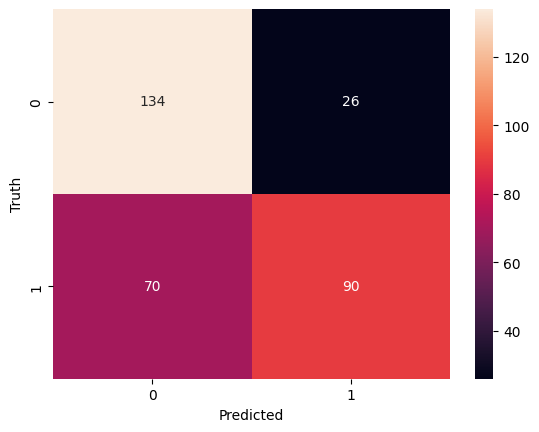

In [26]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
print(classification_report(y_test.deceptive, y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       160
           1       0.78      0.56      0.65       160

    accuracy                           0.70       320
   macro avg       0.72      0.70      0.69       320
weighted avg       0.72      0.70      0.69       320



In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,AveragePooling1D
import keras

# define and fit the final model
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
   ]
model = Sequential()
model.add(keras.Input(shape=(50,768,)))
model.add(AveragePooling1D(pool_size=(50)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling1d (AverageP  (None, 1, 768)           0         
 ooling1D)                                                       
                                                                 
 dense_3 (Dense)             (None, 1, 64)             49216     
                                                                 
 dense_4 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 51,329
Trainable params: 51,329
Non-trainable params: 0
_________________________________________________________________


In [30]:
startedTime = time.time()
model.fit(X_train_embedding_squeezed,y_train.deceptive, epochs=50, batch_size=64, verbose=1)
endTime= time.time()
print("\nTrain Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

Epoch 1/50
20/20 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.5047 - precision: 0.5034 - recall: 0.6938
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5305 - precision: 0.5230 - recall: 0.6938
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5680 - precision: 0.5462 - recall: 0.8031
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.5875 - precision: 0.5870 - recall: 0.5906
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5742 - precision: 0.5683 - recall: 0.6172
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5945 - precision: 0.6031 - recall: 0.5531
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6320 - precision: 0.6275 - recall: 0.6500
Epoch 8/50
20/20 [==============================] - 0s 

In [31]:
model.evaluate(X_test_embedding_squeezed, y_test.deceptive)

10/10 [==============================] - 0s 7ms/step - loss: 0.5165 - accuracy: 0.7531 - precision: 0.7832 - recall: 0.7000


[0.5164785385131836, 0.753125011920929, 0.7832167744636536, 0.699999988079071]

In [32]:
y_predicted = model.predict(X_test_embedding_squeezed)
y_predicted = y_predicted.flatten()

10/10 [==============================] - 0s 5ms/step


In [33]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test.deceptive, y_predicted)
cm

array([[129,  31],
       [ 48, 112]])

Text(50.722222222222214, 0.5, 'Truth')

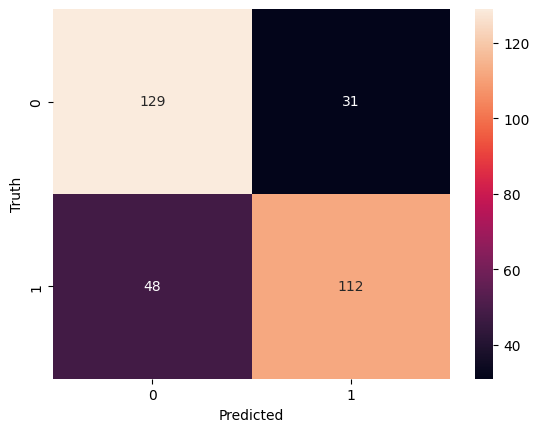

In [35]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test.deceptive, y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       160
           1       0.78      0.70      0.74       160

    accuracy                           0.75       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320



In [37]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(1280, input_shape=(50,768)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1280)              10490880  
                                                                 
 dense_6 (Dense)             (None, 64)                81984     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,574,977
Trainable params: 10,574,977
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
startedTime = time.time()
model.fit(X_train_embedding_squeezed,y_train.deceptive, epochs=50, batch_size=64, verbose=1)
endTime= time.time()
print("\nTrain Elapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

Epoch 1/50
20/20 [==============================] - 74s 4s/step - loss: 0.6927 - accuracy: 0.4953
Epoch 2/50
20/20 [==============================] - 72s 4s/step - loss: 0.6922 - accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 74s 4s/step - loss: 0.6914 - accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 72s 4s/step - loss: 0.6913 - accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 73s 4s/step - loss: 0.6909 - accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 71s 4s/step - loss: 0.6894 - accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 72s 4s/step - loss: 0.6797 - accuracy: 0.5219
Epoch 8/50
20/20 [==============================] - 73s 4s/step - loss: 0.6860 - accuracy: 0.5641
Epoch 9/50
20/20 [==============================] - 75s 4s/step - loss: 0.6756 - accuracy: 0.5891
Epoch 10/50
20/20 [==============================] - 73s 4s/step - loss: 0.6752 - accuracy: 0.5953
Epoch 11/50
20/20 [

In [39]:
model.evaluate(X_test_embedding_squeezed, y_test.deceptive)

10/10 [==============================] - 6s 549ms/step - loss: 0.4769 - accuracy: 0.7812


[0.47686848044395447, 0.78125]

In [40]:
y_predicted = model.predict(X_test_embedding_squeezed)
y_predicted = y_predicted.flatten()

10/10 [==============================] - 7s 664ms/step


In [41]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test.deceptive, y_predicted)
cm

array([[138,  22],
       [ 48, 112]])

Text(50.722222222222214, 0.5, 'Truth')

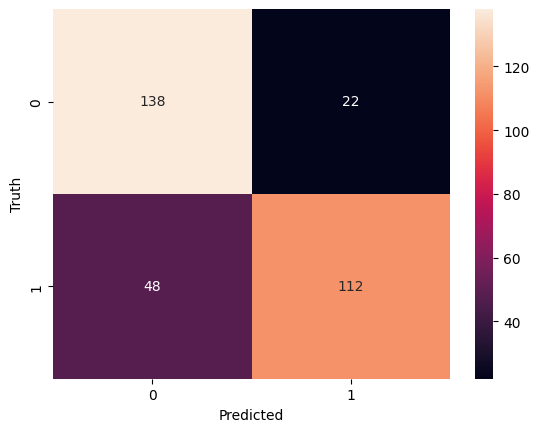

In [43]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
print(classification_report(y_test.deceptive, y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       160
           1       0.84      0.70      0.76       160

    accuracy                           0.78       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.79      0.78      0.78       320

